<a href="https://colab.research.google.com/github/jos0213/kaggle/blob/main/Predict_the_Customer_Satisfaction_CSE_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Kaggle/train_dataset.csv')

In [6]:
def column_summary(df):
    summary_data = []

    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()

        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })

    summary_df = pd.DataFrame(summary_data)
    return summary_df

In [7]:
column_summary(df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,id,int64,0,206969,206969,"{0: 1, 137983: 1, 137973: 1, 137974: 1, 137975..."
1,user_id,object,0,206969,186931,"{'****256449': 5, '****565724': 4, '****725671..."
2,age,int64,0,206969,44,"{20: 6045, 19: 4916, 34: 4874, 38: 4860, 39: 4..."
3,Gender,object,0,206969,3,"{'F': 69363, 'O': 68858, 'M': 68748}"
4,Date_Registered,object,0,206969,1823,"{'2021-09-18': 174, '2021-03-23': 156, '2023-0..."
5,Is_current_loyalty_program_member,object,0,206969,2,"{'YES': 103590, 'NO': 103379}"
6,loyalty_points_redeemed,int64,0,206969,6,"{0: 36349, 1: 34314, 3: 34268, 5: 34193, 4: 33..."
7,loyalty_tier,float64,102067,104902,4,"{1.0: 28189, 2.0: 25712, 3.0: 25583, 4.0: 25418}"
8,Received_tier_discount_percentage,float64,103379,103590,4,"{5.0: 26052, 7.0: 25911, 3.0: 25872, 10.0: 25755}"
9,Received_card_discount_percentage,float64,156879,50090,104,"{2.0: 9601, 4.0: 9534, 5.0: 9477, 1.0: 9444, 3..."


In [10]:
def column_summary_plus(df):
    results = []

    for column in df.columns:
        print(f"Processing column: {column} (dtype: {df[column].dtype})")

        col_dtype = df[column].dtype
        num_distinct_values = df[column].nunique(dropna=True)
        value_counts = df[column].value_counts()
        distinct_values = value_counts.index.tolist()

        # Min and Max
        min_value = df[column].min() if pd.api.types.is_numeric_dtype(df[column]) else None
        max_value = df[column].max() if pd.api.types.is_numeric_dtype(df[column]) else None

        # Median
        median = df[column].median() if pd.api.types.is_numeric_dtype(df[column]) else None

        # Averages
        if pd.api.types.is_numeric_dtype(df[column]):
            non_zero_vals = df[column][df[column] > 0].dropna()
            average = df[column].mean()
            average_non_zero = non_zero_vals.mean() if not non_zero_vals.empty else None
        else:
            average = None
            average_non_zero = None

        # Null information
        null_present = int(df[column].isnull().any())
        num_nulls = df[column].isnull().sum()
        num_non_nulls = df[column].notnull().sum()

        # Top 10 distinct values
        top_10_values = value_counts.head(10).to_dict()

        results.append({
            'col_name': column,
            'col_dtype': col_dtype,
            'num_distinct_values': num_distinct_values,
            'min_value': min_value,
            'max_value': max_value,
            'median_no_na': median,
            'average_no_na': average,
            'average_non_zero': average_non_zero,
            'null_present': null_present,
            'nulls_num': num_nulls,
            'non_nulls_num': num_non_nulls,
            'distinct_values': top_10_values
        })

    # Convert results to DataFrame
    result_df = pd.DataFrame(results)
    return result_df


In [11]:
column_summary_plus(df)

Processing column: id (dtype: int64)
Processing column: user_id (dtype: object)
Processing column: age (dtype: int64)
Processing column: Gender (dtype: object)
Processing column: Date_Registered (dtype: object)
Processing column: Is_current_loyalty_program_member (dtype: object)
Processing column: loyalty_points_redeemed (dtype: int64)
Processing column: loyalty_tier (dtype: float64)
Processing column: Received_tier_discount_percentage (dtype: float64)
Processing column: Received_card_discount_percentage (dtype: float64)
Processing column: Received_coupon_discount_percentage (dtype: int64)
Processing column: product_category (dtype: object)
Processing column: Product_value (dtype: int64)
Processing column: transaction_id (dtype: object)
Processing column: order_id (dtype: object)
Processing column: payment_method (dtype: object)
Processing column: payment_datetime (dtype: object)
Processing column: purchased_datetime (dtype: object)
Processing column: purchase_medium (dtype: object)
Pr

,col_name,col_dtype,num_distinct_values,min_value,max_value,median_no_na,average_no_na,average_non_zero,null_present,nulls_num,non_nulls_num,distinct_values
0,id,int64,206969,0.0,206968.0,103484.0,103484.000000,103484.500000,0,0,206969,"{0: 1, 137983: 1, 137973: 1, 137974: 1, 137975..."
1,user_id,object,186931,NaN,NaN,NaN,NaN,NaN,0,0,206969,"{'****256449': 5, '****565724': 4, '****725671..."
2,age,int64,44,0.0,60.0,39.0,38.624668,38.871077,0,0,206969,"{20: 6045, 19: 4916, 34: 4874, 38: 4860, 39: 4..."
3,Gender,object,3,NaN,NaN,NaN,NaN,NaN,0,0,206969,"{'F': 69363, 'O': 68858, 'M': 68748}"
4,Date_Registered,object,1823,NaN,NaN,NaN,NaN,NaN,0,0,206969,"{'2021-09-18': 174, '2021-03-23': 156, '2023-0..."
5,Is_current_loyalty_program_member,object,2,NaN,NaN,NaN,NaN,NaN,0,0,206969,"{'YES': 103590, 'NO': 103379}"
6,loyalty_points_redeemed,int64,6,0.0,5.0,2.0,2.472481,2.999220,0,0,206969,"{0: 36349, 1: 34314, 3: 34268, 5: 34193, 4: 33..."
7,loyalty_tier,float64,4,1.0,4.0,2.0,2.459762,2.459762,1,102067,104902,"{1.0: 28189, 2.0: 25712, 3.0: 25583, 4.0: 25418}"
8,Received_tier_discount_percentage,float64,4,3.0,10.0,5.0,6.243875,6.243875,1,103379,103590,"{5.0: 26052, 7.0: 25911, 3.0: 25872, 10.0: 25755}"
9,Received_card_discount_percentage,float64,104,1.0,199.0,3.0,10.780775,10.780775,1,156879,50090,"{2.0: 9601, 4.0: 9534, 5.0: 9477, 1.0: 9444, 3..."


In [12]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
print(df.head())
print(df.describe())
print(df.duplicated().sum())

   id     user_id  age Gender Date_Registered Is_current_loyalty_program_member  loyalty_points_redeemed  loyalty_tier  Received_tier_discount_percentage  Received_card_discount_percentage  Received_coupon_discount_percentage product_category  Product_value transaction_id   order_id payment_method     payment_datetime   purchased_datetime purchase_medium  final_payment released_date estimated_delivery_date received_date shipping_method tracking_number customer_experience
0   0  ****589084   44      O      2020-01-01                                NO                        5           NaN                                NaN                                3.0                                    3  office supplies           1003    ***95994394  ***242641         visa_c  2020-01-05 22:27:16  2020-01-05 22:27:16          online        1293.00    2020-01-12              2020-01-17    2020-01-17        standard   ***9AWDD64SYI             neutral
1   1  ****494191   36      O      2020-01-04   

In [13]:
def univariate_analysis(df, unique_threshold=10):
    # Identify numerical columns
    numerical_columns = df.select_dtypes(include=[np.number]).columns

    for column in numerical_columns:
        # Drop missing values for analysis
        column_data = df[column].dropna()

        if column_data.empty:
            print(f"Column '{column}' contains only null values. Skipping...")
            continue

        # Continuous variables (unique values > unique_threshold)
        if len(column_data.unique()) > unique_threshold:
            plt.figure(figsize=(8, 6))
            sns.histplot(column_data, kde=True, color='skyblue')
            plt.title(f'Histogram of {column}', fontsize=14)
            plt.xlabel(column, fontsize=12)
            plt.ylabel('Frequency', fontsize=12)
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.show()

            # Add boxplot for outlier detection
            plt.figure(figsize=(8, 2))
            sns.boxplot(x=column_data, color='lightcoral')
            plt.title(f'Boxplot of {column}', fontsize=14)
            plt.xlabel(column, fontsize=12)
            plt.show()

        # Discrete variables (unique values <= unique_threshold)
        else:
            plt.figure(figsize=(8, 6))
            ax = sns.countplot(x=column, data=df, palette='viridis', order=df[column].value_counts().index)
            plt.title(f'Count of {column}', fontsize=14)
            plt.xlabel(column, fontsize=12)
            plt.ylabel('Count', fontsize=12)

            # Annotate each bar with its count
            for p in ax.patches:
                ax.annotate(format(p.get_height(), '.0f'),
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center',
                            xytext=(0, 5),
                            textcoords='offset points')

            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.show()

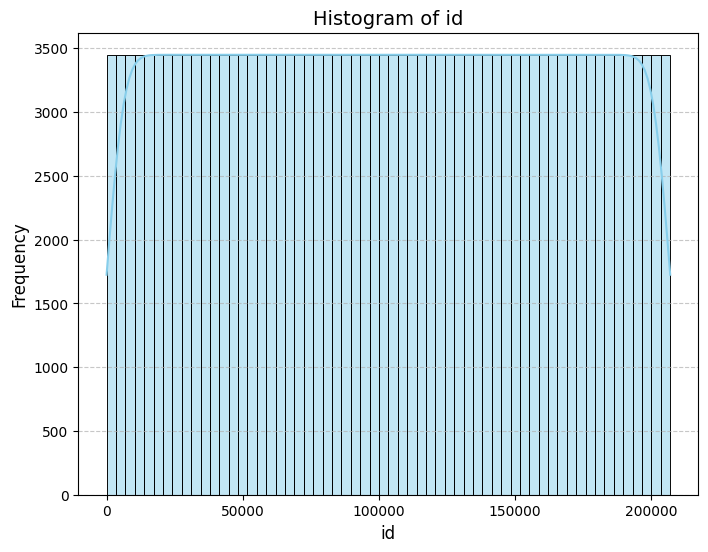

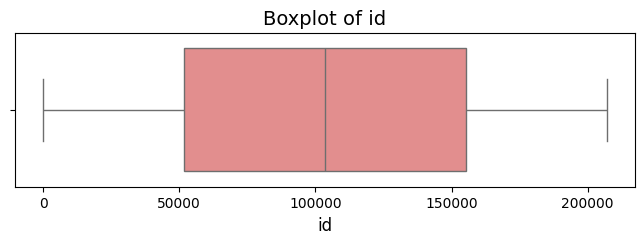

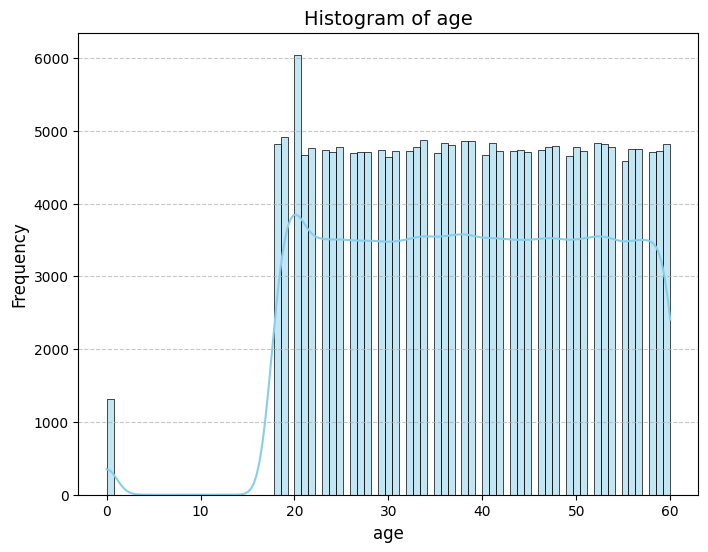

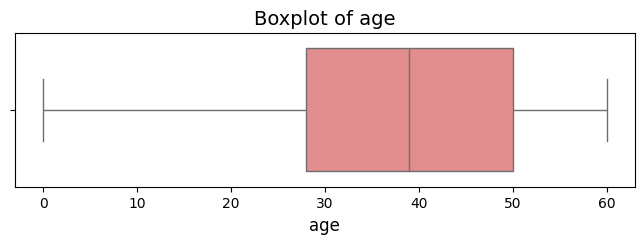

<ipython-input-13-4db50c6e585b>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='viridis', order=df[column].value_counts().index)


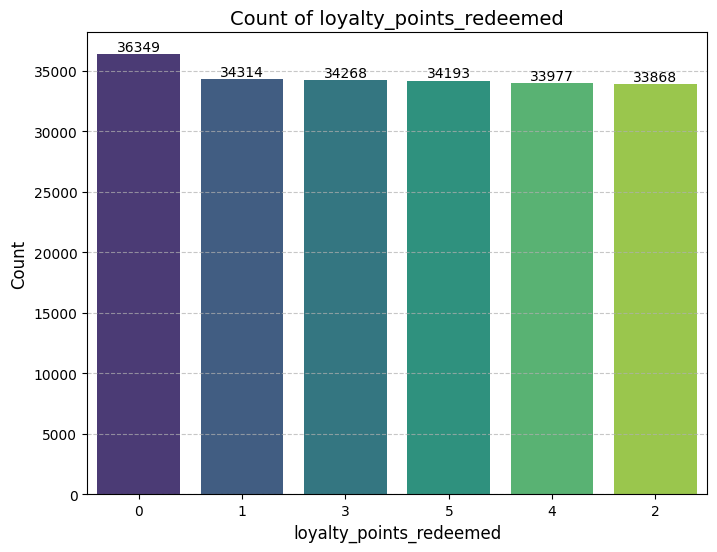

<ipython-input-13-4db50c6e585b>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='viridis', order=df[column].value_counts().index)


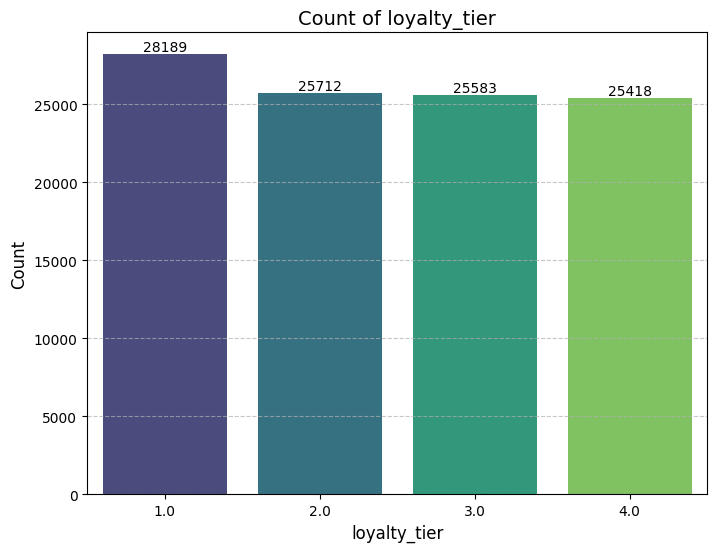

<ipython-input-13-4db50c6e585b>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='viridis', order=df[column].value_counts().index)


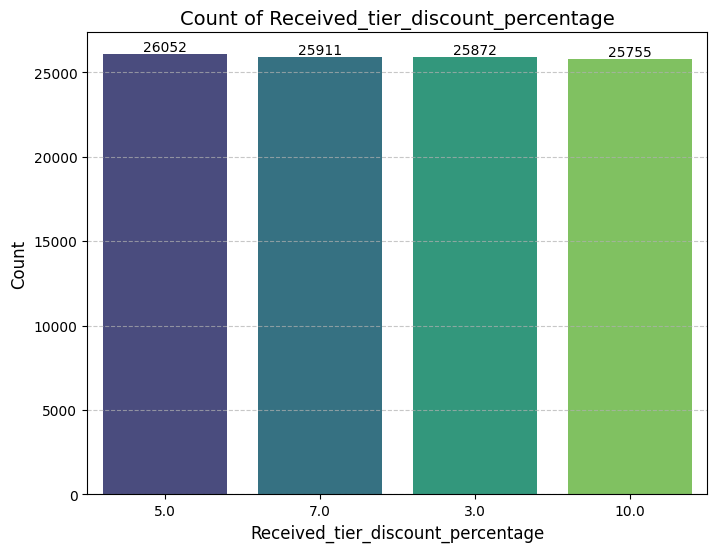

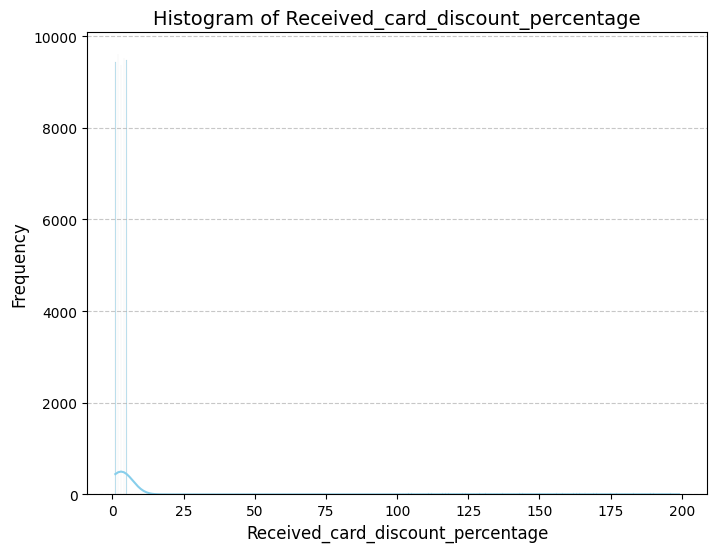

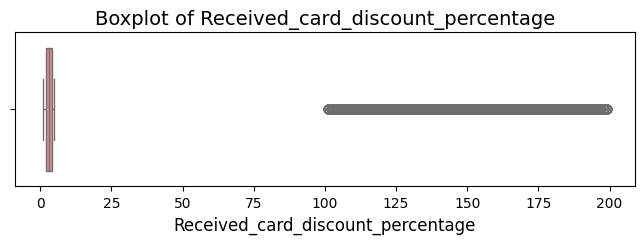

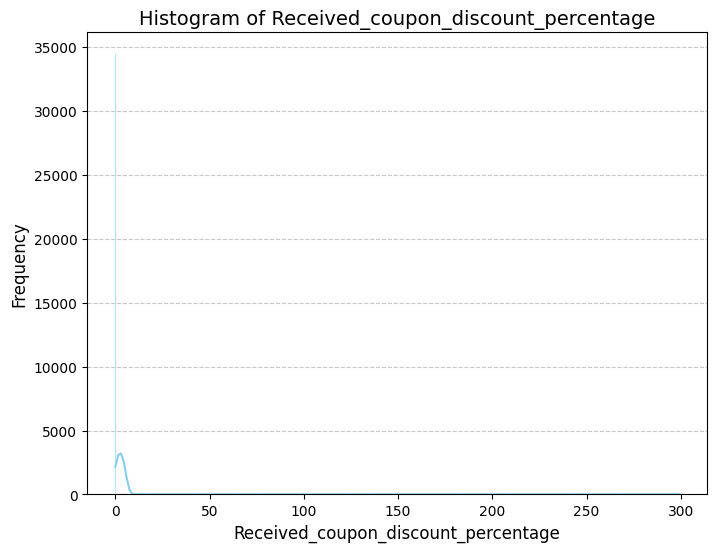

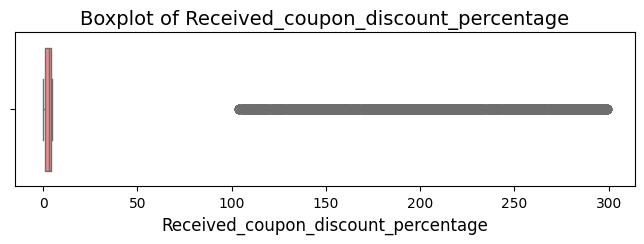

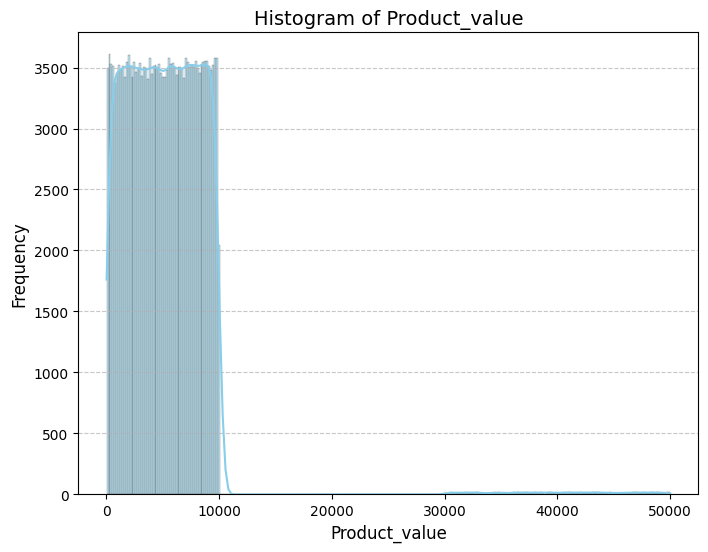

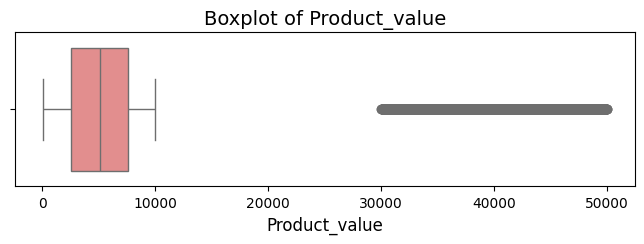

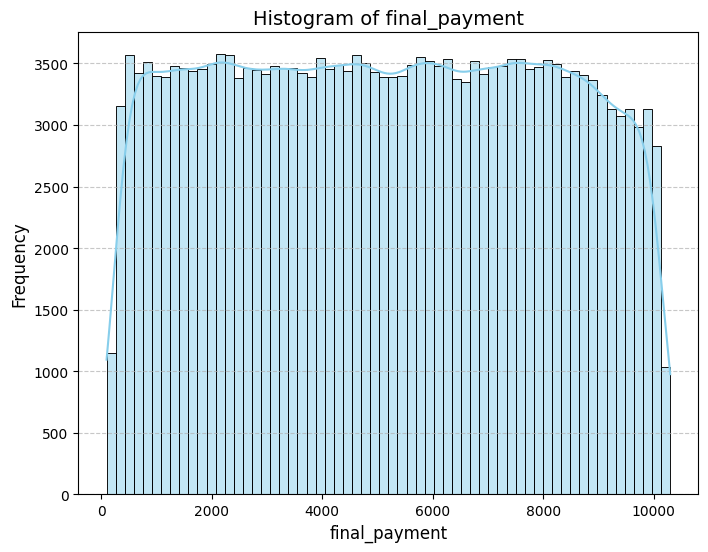

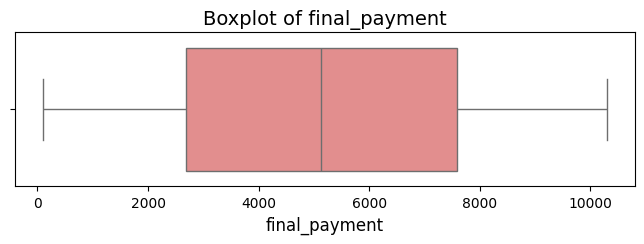

In [14]:
univariate_analysis(df)

In [15]:
def univariate_analysis(df, unique_threshold=10):
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    categorical_columns = df.select_dtypes(exclude=[np.number]).columns

    for column in df.columns:
        print(f"Processing column: {column}")

        # Numerical variables
        if column in numerical_columns:
            column_data = df[column].dropna()

            if column_data.empty:
                print(f"Column '{column}' contains only null values. Skipping...")
                continue

            fig, axes = plt.subplots(1, 3, figsize=(18, 5))

            # Histogram + KDE
            sns.histplot(column_data, kde=True, ax=axes[0], color='skyblue')
            axes[0].set_title(f'Histogram of {column}', fontsize=12)
            axes[0].set_xlabel(column, fontsize=10)
            axes[0].set_ylabel('Frequency', fontsize=10)

            # Box Plot
            sns.boxplot(x=column_data, ax=axes[1], color='lightcoral')
            axes[1].set_title(f'Boxplot of {column}', fontsize=12)
            axes[1].set_xlabel(column, fontsize=10)

            # Scatter Plot with a random numerical variable if available
            other_numerical = [col for col in numerical_columns if col != column]
            if other_numerical:
                sns.scatterplot(x=column_data, y=df[other_numerical[0]], ax=axes[2], color='mediumseagreen')
                axes[2].set_title(f'Scatter Plot of {column} and {other_numerical[0]}', fontsize=12)
                axes[2].set_xlabel(column, fontsize=10)
                axes[2].set_ylabel(other_numerical[0], fontsize=10)
            else:
                axes[2].remove()

            plt.tight_layout()
            plt.show()

        # Categorical variables
        elif column in categorical_columns:
            column_data = df[column].dropna()

            if column_data.empty:
                print(f"Column '{column}' contains only null values. Skipping...")
                continue

            fig, axes = plt.subplots(1, 3, figsize=(18, 5))

            # Bar Plot
            sns.countplot(x=column, data=df, ax=axes[0], palette='viridis', order=column_data.value_counts().index)
            axes[0].set_title(f'Bar Plot of {column}', fontsize=12)
            axes[0].set_xlabel(column, fontsize=10)
            axes[0].set_ylabel('Count', fontsize=10)

            # Pie Chart
            column_data.value_counts().plot.pie(
                autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel", len(column_data.unique())), ax=axes[1]
            )
            axes[1].set_title(f'Pie Chart of {column}', fontsize=12)
            axes[1].set_ylabel('')  # Remove default ylabel

            # Stacked Bar Plot with another categorical column if available
            other_categorical = [col for col in categorical_columns if col != column]
            if other_categorical:
                crosstab = pd.crosstab(df[column], df[other_categorical[0]])
                crosstab.plot(kind='bar', stacked=True, ax=axes[2], colormap='viridis')
                axes[2].set_title(f'Stacked Bar Plot of {column} and {other_categorical[0]}', fontsize=12)
                axes[2].set_xlabel(column, fontsize=10)
                axes[2].set_ylabel('Count', fontsize=10)
            else:
                axes[2].remove()

            plt.tight_layout()
            plt.show()


Processing column: id


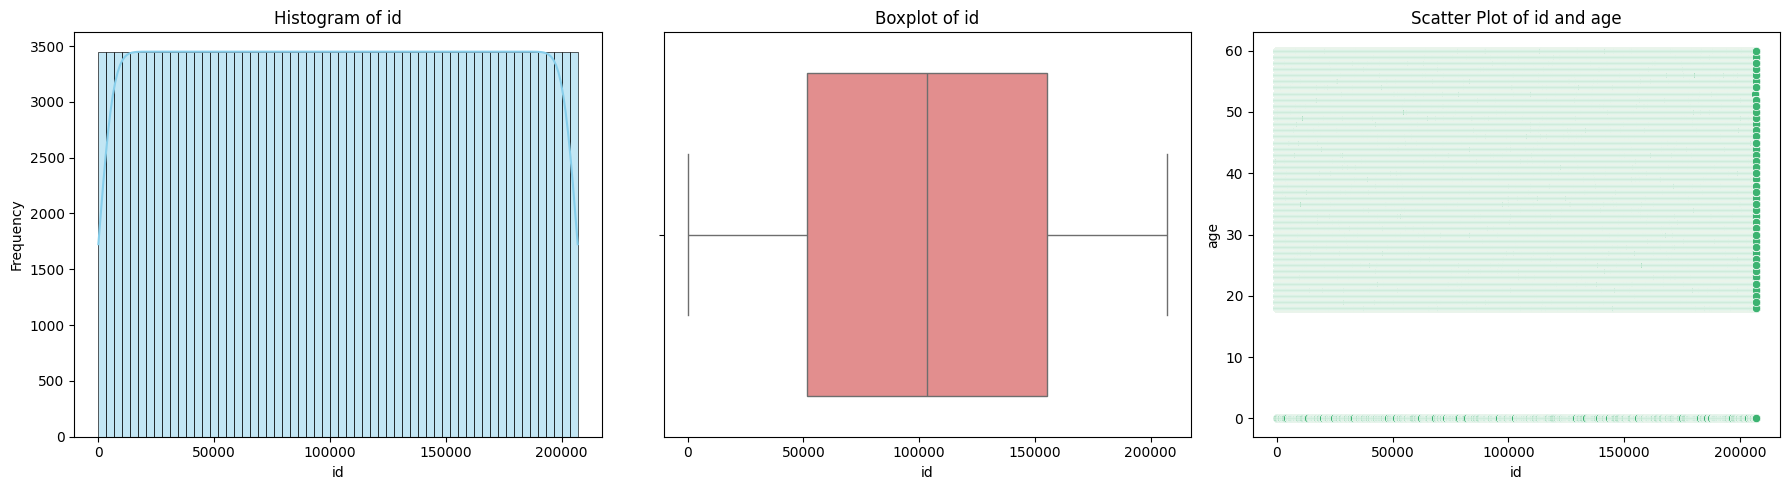

Processing column: user_id


<ipython-input-15-738d005da364>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, ax=axes[0], palette='viridis', order=column_data.value_counts().index)


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7a456cac3f60> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7a456cac0400> (for post_execute):


KeyboardInterrupt: 

In [16]:
univariate_analysis(df)

In [17]:
def univariate_analysis(df, unique_threshold=10):
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    categorical_columns = df.select_dtypes(exclude=[np.number]).columns

    for column in df.columns:
        print(f"Processing column: {column}")

        column_data = df[column].dropna()
        if column_data.empty:
            print(f"Column '{column}' contains only null values. Skipping...")
            continue

        fig, axes = plt.subplots(1, 3, figsize=(18, 5))

        # Numerical Variables
        if column in numerical_columns:
            # Histogram + KDE
            sns.histplot(column_data, kde=True, ax=axes[0], color='skyblue')
            axes[0].set_title(f'Histogram of {column}', fontsize=12)
            axes[0].set_xlabel(column, fontsize=10)
            axes[0].set_ylabel('Frequency', fontsize=10)

            # Box Plot
            sns.boxplot(x=column_data, ax=axes[1], color='lightcoral')
            axes[1].set_title(f'Boxplot of {column}', fontsize=12)
            axes[1].set_xlabel(column, fontsize=10)

            # Scatter Plot (if other numerical columns exist)
            other_numerical = [col for col in numerical_columns if col != column]
            if other_numerical:
                sns.scatterplot(x=column_data, y=df[other_numerical[0]], ax=axes[2], color='mediumseagreen')
                axes[2].set_title(f'Scatter Plot of {column} vs {other_numerical[0]}', fontsize=12)
                axes[2].set_xlabel(column, fontsize=10)
                axes[2].set_ylabel(other_numerical[0], fontsize=10)
            else:
                axes[2].remove()

        # Categorical Variables
        elif column in categorical_columns:
            # Bar Plot
            sns.countplot(x=column, data=df, ax=axes[0], palette='viridis', order=column_data.value_counts().index)
            axes[0].set_title(f'Bar Plot of {column}', fontsize=12)
            axes[0].set_xlabel(column, fontsize=10)
            axes[0].set_ylabel('Count', fontsize=10)

            # Pie Chart
            column_data.value_counts().plot.pie(
                autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel", len(column_data.unique())), ax=axes[1]
            )
            axes[1].set_title(f'Pie Chart of {column}', fontsize=12)
            axes[1].set_ylabel('')  # Remove default ylabel

            # Stacked Bar Plot (if another categorical column exists)
            other_categorical = [col for col in categorical_columns if col != column]
            if other_categorical:
                crosstab = pd.crosstab(df[column], df[other_categorical[0]])
                crosstab.plot(kind='bar', stacked=True, ax=axes[2], colormap='viridis', legend=False)
                axes[2].set_title(f'Stacked Bar Plot of {column} and {other_categorical[0]}', fontsize=12)
                axes[2].set_xlabel(column, fontsize=10)
                axes[2].set_ylabel('Count', fontsize=10)
            else:
                axes[2].remove()

        plt.tight_layout()
        plt.show()

Processing column: id


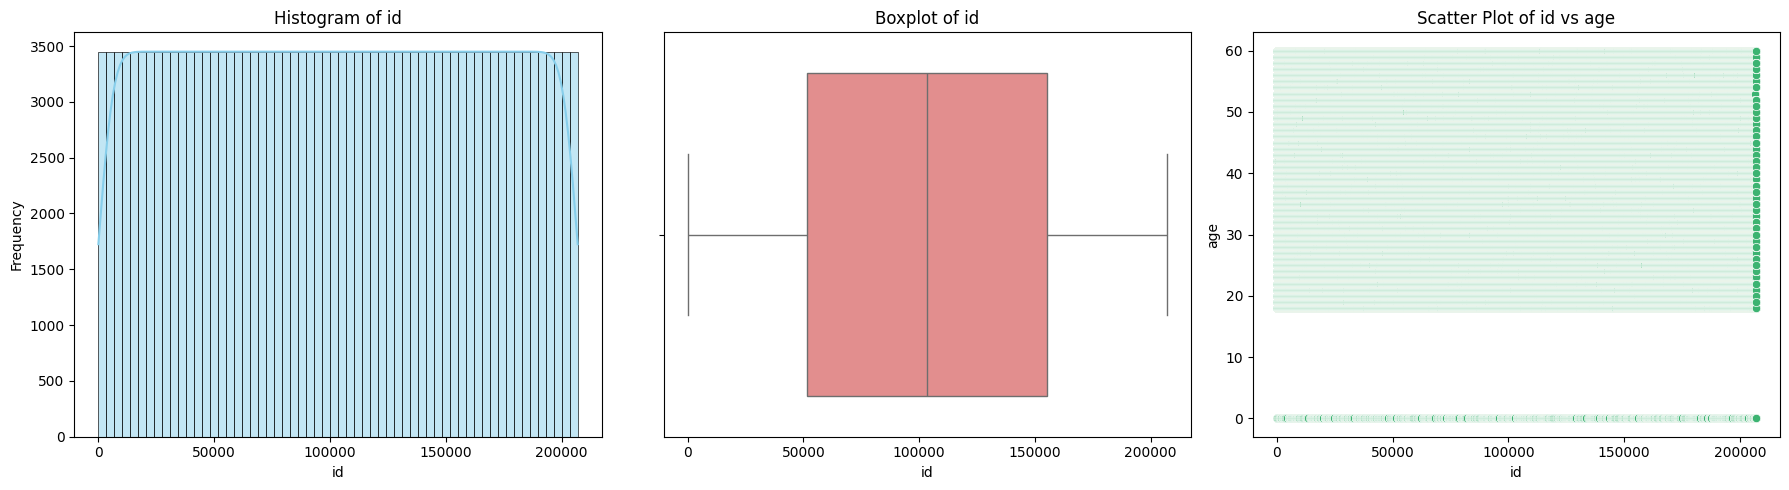

Processing column: user_id


<ipython-input-17-a33b9f5ceffa>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, ax=axes[0], palette='viridis', order=column_data.value_counts().index)


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7a456cac3f60> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7a456cac0400> (for post_execute):


KeyboardInterrupt: 

In [18]:
univariate_analysis(df)

In [19]:
def univariate_analysis(df, unique_threshold=10):
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    categorical_columns = df.select_dtypes(exclude=[np.number]).columns

    for column in df.columns:
        print(f"Processing column: {column}")

        column_data = df[column].dropna()
        if column_data.empty:
            print(f"Column '{column}' contains only null values. Skipping...")
            continue

        fig, axes = plt.subplots(1, 3, figsize=(18, 5))

        # Numerical Variables
        if column in numerical_columns:
            # Histogram + KDE
            sns.histplot(column_data, kde=True, ax=axes[0], color='skyblue')
            axes[0].set_title(f'Histogram of {column}', fontsize=12)
            axes[0].set_xlabel(column, fontsize=10)
            axes[0].set_ylabel('Frequency', fontsize=10)

            # Box Plot
            sns.boxplot(x=column_data, ax=axes[1], color='lightcoral')
            axes[1].set_title(f'Boxplot of {column}', fontsize=12)
            axes[1].set_xlabel(column, fontsize=10)

            # Scatter Plot (if other numerical columns exist)
            other_numerical = [col for col in numerical_columns if col != column]
            if other_numerical:
                sns.scatterplot(x=column_data, y=df[other_numerical[0]], ax=axes[2], color='mediumseagreen')
                axes[2].set_title(f'Scatter Plot of {column} vs {other_numerical[0]}', fontsize=12)
                axes[2].set_xlabel(column, fontsize=10)
                axes[2].set_ylabel(other_numerical[0], fontsize=10)
            else:
                axes[2].remove()

        # Categorical Variables
        elif column in categorical_columns:
            # Bar Plot
            sns.countplot(
                x=column,
                data=df,
                ax=axes[0],
                order=column_data.value_counts().index
            )
            axes[0].set_title(f'Bar Plot of {column}', fontsize=12)
            axes[0].set_xlabel(column, fontsize=10)
            axes[0].set_ylabel('Count', fontsize=10)

            # Pie Chart
            column_data.value_counts().plot.pie(
                autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel", len(column_data.unique())), ax=axes[1]
            )
            axes[1].set_title(f'Pie Chart of {column}', fontsize=12)
            axes[1].set_ylabel('')  # Remove default ylabel

            # Stacked Bar Plot (if another categorical column exists)
            other_categorical = [col for col in categorical_columns if col != column]
            if other_categorical:
                crosstab = pd.crosstab(df[column], df[other_categorical[0]])
                crosstab.plot(kind='bar', stacked=True, ax=axes[2], colormap='viridis', legend=False)
                axes[2].set_title(f'Stacked Bar Plot of {column} and {other_categorical[0]}', fontsize=12)
                axes[2].set_xlabel(column, fontsize=10)
                axes[2].set_ylabel('Count', fontsize=10)
            else:
                axes[2].remove()

        plt.tight_layout()
        plt.show()
        plt.close(fig)  # Explicitly close the figure to prevent overlapping


Processing column: id


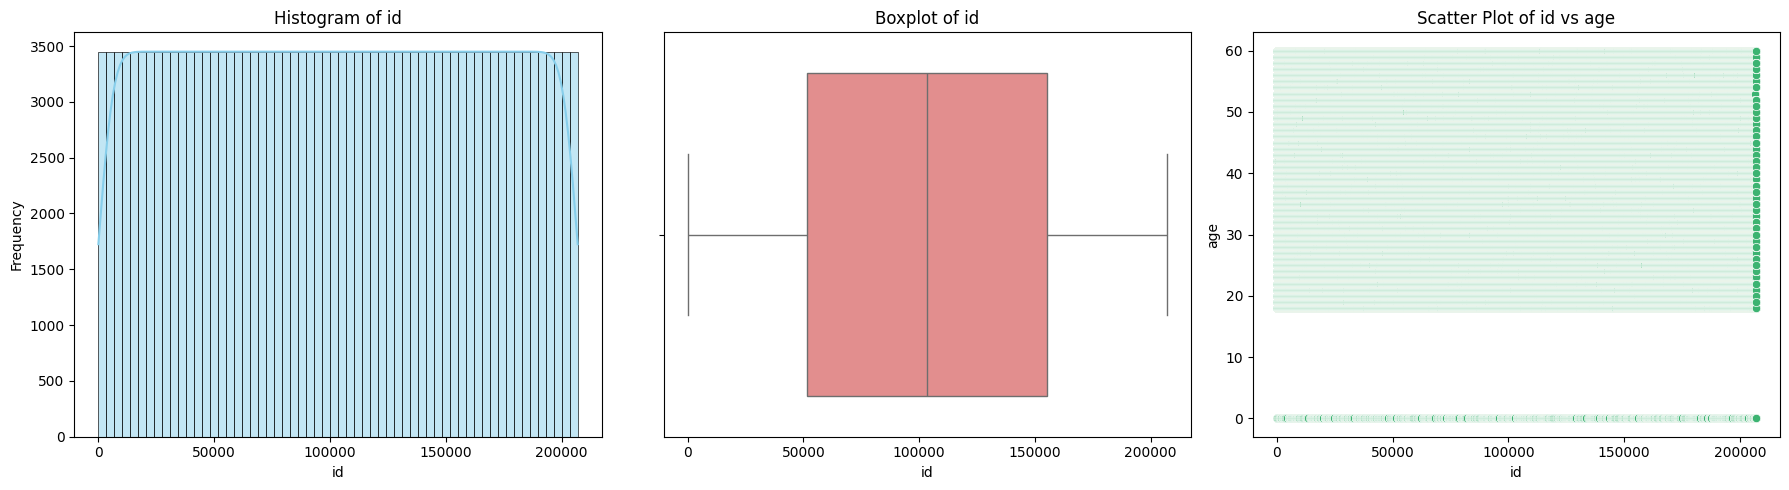

Processing column: user_id


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7a456cac3f60> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7a456cac0400> (for post_execute):


KeyboardInterrupt: 

In [20]:
univariate_analysis(df)

In [21]:
from IPython.display import display, clear_output

def univariate_analysis(df, unique_threshold=10):
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    categorical_columns = df.select_dtypes(exclude=[np.number]).columns

    for column in df.columns:
        print(f"Processing column: {column}")

        column_data = df[column].dropna()
        if column_data.empty:
            print(f"Column '{column}' contains only null values. Skipping...")
            continue

        fig, axes = plt.subplots(1, 3, figsize=(18, 5))

        # Numerical Variables
        if column in numerical_columns:
            # Histogram + KDE
            sns.histplot(column_data, kde=True, ax=axes[0], color='skyblue')
            axes[0].set_title(f'Histogram of {column}', fontsize=12)
            axes[0].set_xlabel(column, fontsize=10)
            axes[0].set_ylabel('Frequency', fontsize=10)

            # Box Plot
            sns.boxplot(x=column_data, ax=axes[1], color='lightcoral')
            axes[1].set_title(f'Boxplot of {column}', fontsize=12)
            axes[1].set_xlabel(column, fontsize=10)

            # Scatter Plot (if other numerical columns exist)
            other_numerical = [col for col in numerical_columns if col != column]
            if other_numerical:
                sns.scatterplot(x=column_data, y=df[other_numerical[0]], ax=axes[2], color='mediumseagreen')
                axes[2].set_title(f'Scatter Plot of {column} vs {other_numerical[0]}', fontsize=12)
                axes[2].set_xlabel(column, fontsize=10)
                axes[2].set_ylabel(other_numerical[0], fontsize=10)
            else:
                axes[2].remove()

        # Categorical Variables
        elif column in categorical_columns:
            # Bar Plot
            sns.countplot(
                x=column,
                data=df,
                ax=axes[0],
                order=column_data.value_counts().index
            )
            axes[0].set_title(f'Bar Plot of {column}', fontsize=12)
            axes[0].set_xlabel(column, fontsize=10)
            axes[0].set_ylabel('Count', fontsize=10)

            # Pie Chart
            column_data.value_counts().plot.pie(
                autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel", len(column_data.unique())), ax=axes[1]
            )
            axes[1].set_title(f'Pie Chart of {column}', fontsize=12)
            axes[1].set_ylabel('')  # Remove default ylabel

            # Stacked Bar Plot (if another categorical column exists)
            other_categorical = [col for col in categorical_columns if col != column]
            if other_categorical:
                crosstab = pd.crosstab(df[column], df[other_categorical[0]])
                crosstab.plot(kind='bar', stacked=True, ax=axes[2], colormap='viridis', legend=False)
                axes[2].set_title(f'Stacked Bar Plot of {column} and {other_categorical[0]}', fontsize=12)
                axes[2].set_xlabel(column, fontsize=10)
                axes[2].set_ylabel('Count', fontsize=10)
            else:
                axes[2].remove()

        plt.tight_layout()
        plt.show()
        plt.close(fig)  # Explicitly close the figure to prevent overlapping

        # Force render in Colab
        clear_output(wait=True)
        display(fig)


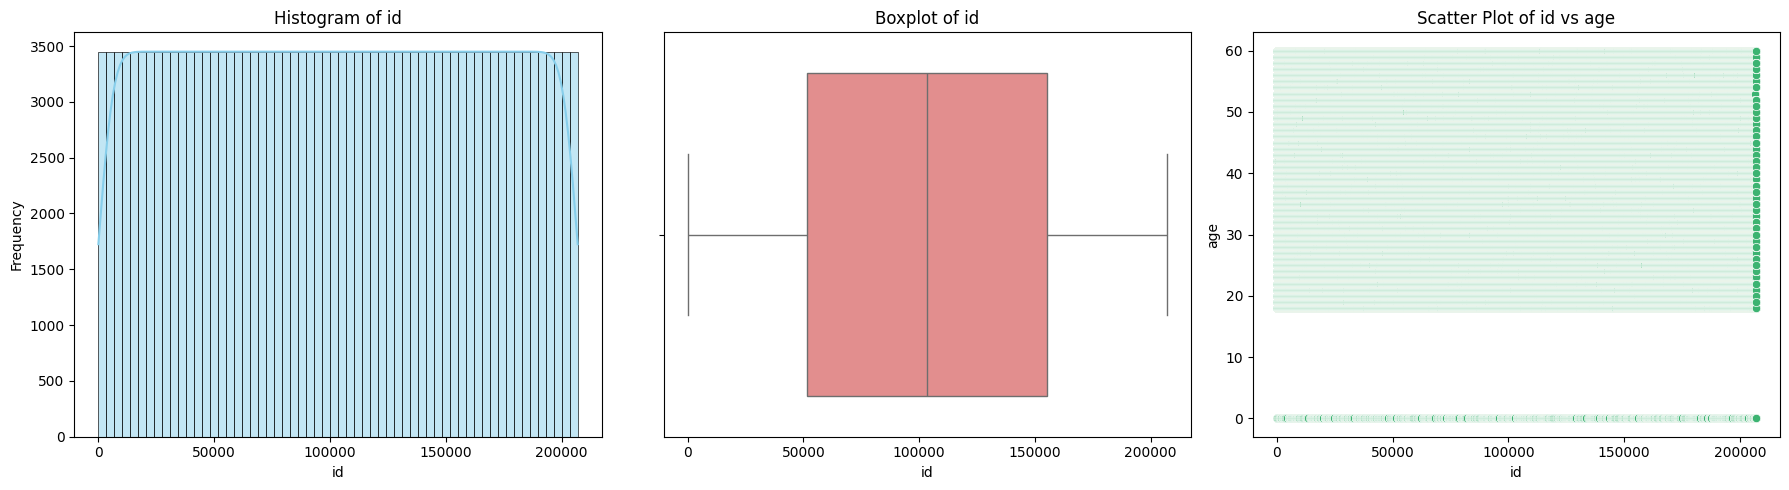

Processing column: user_id


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7a456cac3f60> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7a456cac0400> (for post_execute):


KeyboardInterrupt: 

In [22]:
univariate_analysis(df)